# Shot noise analysis and plots

Generate gain plots, determine shot noise of photodiode, error analysis

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def G(f, g, df=0.01):
    """
    Computes G using trapezoidal rule and returns sum and error
    f is a list with frequency domain given in kHz
    g is a list with corresponding gain as function of frequency
    df is optional but should be finer than precision of f
    """
    # TODO add error analysis
    S = 0
    if len(f) != len(g):
        print("Dimensions don't match!")
        return -1, -1
    for i in range(len(f)-1):
        n = int(round((f[i+1]-f[i])/df, 2))
        fp = [f[i] + j*df for j in range(n+1)]
        for j in range(n):
            S += 1.0e3 * df * (g[i] + (g[i+1]-g[i])*(j+0.5)*df/(f[i+1]-f[i]))**2 
            # print(S)
        S += 1.0e3 * (f[i+1] - fp[-1]) * (g[i] + (g[i+1]-g[i])*(f[i+1]/2 + fp[-1]/2 - f[i])/(f[i+1]-f[i]))**2 
        # print(S)
    return S

In [3]:
def plotgp(f, g, df=0.1):
    """
    Formats gain data to visualize G integral
    f is a list with frequency domain given in kHz
    g is a list with corresponding gain as function of frequency
    df is optional but should be finer than precision of f
    """
    # TODO add error analysis
    x = []
    y = []
    if len(f) != len(g):
        print("Dimensions don't match!")
        return -1, -1
    for i in range(len(f)-1):
        n = int(round((f[i+1]-f[i])/df, 2))
        fp = [f[i] + j*df for j in range(n+1)]
        for j in range(n):
            xp = f[i] + j*df
            # nxp = xp + j*df
            x.append(xp)
            y.append((g[i] + (g[i+1]-g[i])*j*df/(f[i+1]-f[i]))**2)
        # print((1 + 1.0e6 * (2*np.pi*R*C*(f[i] + f[i+1])/2)**2))
        # print(y)
    return x, y

<Figure size 432x288 with 0 Axes>

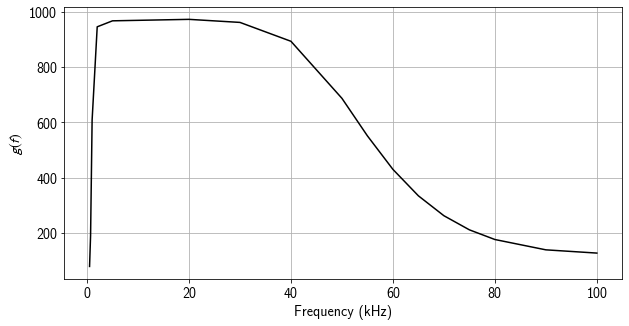

46996549945.03384


<Figure size 432x288 with 0 Axes>

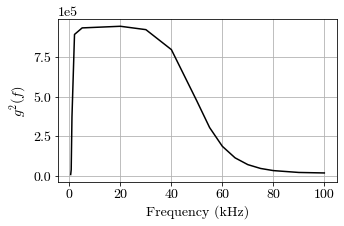

In [10]:
# calibration data for g(f)
x = """| 0.5 |
| 0.7 |
| 1   |
| 2   |
| 5   |
| 20  |
| 30  |
| 40  |
| 50  |
| 55  |
| 60  |
| 65  |
| 70  |
| 75  |
| 80  |
| 90  |
| 100 |
""".strip().replace(' ', '').replace('|', '').split('\n')
y = """| 79.0558769 |
| 191.016904 |
| 608.448816 |
| 945.838888 |
| 967.482785 |
| 972.805643 |
| 961.756038 |
| 893.488805 |
| 687.179996 |
| 551.35054  |
| 430.196061 |
| 334.48653  |
| 262.564168 |
| 211.50225  |
| 176.490471 |
| 139.122428 |
| 127.404771 |
""".strip().replace(' ', '').replace('|', '').split('\n')
err = """| 0.09702082 |
| 0.16925283 |
| 0.27514216 |
| 0.97261072 |
| 0.68859985 |
| 0.61208853 |
| 0.46747437 |
| 0.53171762 |
| 0.8651706  |
| 0.5362433  |
| 0.29126548 |
| 0.36441853 |
| 0.07666113 |
| 0.18293126 |
| 0.18569941 |
| 0.10046278 |
| 0.73681883 |

""".strip().replace(' ', '').replace('|', '').split('\n')
x = list(map(float, x))
y = list(map(float, y))
err = list(map(float, err))
R = 10
V = (2.93**2 - 0.83**2)**0.5
C = 80

plt.clf()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
plt.ylabel('$g(f)$')
plt.xlabel('Frequency (kHz)')
plt.grid(b=True)
plt.plot(x, y, 'k')
# plt.errorbar(x, y, yerr=err, color='r', fmt='.', ecolor='r', capsize=3)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
# plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
plt.ylabel('$g^2(f)$')
plt.xlabel('Frequency (kHz)')
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.grid(b=True)
plt.plot(x, [g**2 for g in y], 'k')
gpx, gpy = plotgp(x, y, df=0.1)
fig = plt.gcf()
fig.set_size_inches(5, 3)
# plt.xlim(1, 6)
# plt.plot(gpx, gpy, 'r')
# plt.errorbar(x, [g**2 for g in y], yerr=[2*e for e in err], color='r', fmt='.', ecolor='r', capsize=3)
plt.savefig('plots/shotgain_r.pdf',bbox_inches='tight',pad_inches=0.25)

# # gross estimate for trapezoidal rule
# S = 0
# for i in range(len(x)-1):
#     S += ((y[i] + y[i+1])/2)**2 * (x[i+1]-x[i])
#     print(round(((y[i] + y[i+1])/2)**2, 1), '\t', round(x[i+1]-x[i],2), '\t', round(S, 2))
Gr = G(x, y, df=0.001)
print(Gr)